## Imports

In [1]:
import pickle
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import animation
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np
from scipy.ndimage.filters import convolve
from PIL import Image

## Loading Datasets

In [2]:
training_dataset_path = "data sets/data.pkl"

def load_data(dataset_path):
    with open(dataset_path, 'rb') as f:
            data = pickle.load(f)
            return data

def get_tensor_dataset():
    all_data = load_data(training_dataset_path)
    tf_data_xt = tf.convert_to_tensor(all_data["x_train"], dtype=tf.float32)
    tf_data_xv = tf.convert_to_tensor(all_data["x_val"], dtype=tf.float32)
    tf_data_yt = tf.convert_to_tensor(all_data["y_train"], dtype=tf.float32)
    tf_data_yv = tf.convert_to_tensor(all_data["y_val"], dtype=tf.float32)

    tf_data_xt = tf.reshape(tf_data_xt, [500,176,1])
    tf_data_xv = tf.reshape(tf_data_xv, [5900,176,1])
    tf_data_yt = tf.reshape(tf_data_yt, [500,1,1])
    tf_data_yv = tf.reshape(tf_data_yv, [5900,1,1])
    
    return tf_data_xt, tf_data_xv, tf_data_yt, tf_data_yv

## Replace training data and validation data, becouse in this data set there is 5900 examples in val data and only 500 in train data 👀

In [3]:
tf_data_xv, tf_data_xt, tf_data_yv, tf_data_yt = get_tensor_dataset()

## Model Definition

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(176,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 176)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               22656     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,785
Trainable params: 22,785
Non-trainable params: 0
_________________________________________________________________


## Compiling and training model

In [5]:
model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(tf_data_xt, tf_data_yt, epochs=7, validation_data=(tf_data_xv, tf_data_yv))  

Epoch 1/7
185/185 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9868 - val_loss: 0.4851 - val_accuracy: 0.5120
Epoch 2/7
185/185 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9900 - val_loss: 0.4834 - val_accuracy: 0.5120
Epoch 3/7
185/185 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9900 - val_loss: 0.4094 - val_accuracy: 0.5120
Epoch 4/7
185/185 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9958 - val_loss: 0.2136 - val_accuracy: 0.6580
Epoch 5/7
185/185 [==============================] - 0s 1ms/step - loss: 9.2398e-04 - accuracy: 0.9995 - val_loss: 0.0730 - val_accuracy: 0.9000
Epoch 6/7
185/185 [==============================] - 0s 1ms/step - loss: 3.4642e-04 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9640
Epoch 7/7
185/185 [==============================] - 0s 1ms/step - loss: 2.3162e-04 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 0.9200


In [6]:
test_loss, test_acc = model.evaluate(tf_data_xv,  tf_data_yv, verbose=1) 
print('Val accuracy:', test_acc)

16/16 [==============================] - 0s 938us/step - loss: 0.0535 - accuracy: 0.9200
Val accuracy: 0.9200000166893005


In [7]:
model.save('data sets/model 1')
# new_model = tf.keras.models.load_model('data sets/model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: data sets/model 1\assets


## Testing This Neural Network Model On JPG

In [8]:
def get_prediction(cut_image):
    # cut image reshape to have only 176 pixels
    # cut image -> to array
    arr = tf.reshape(cut_image, [1,176,1])
    

C:\Users\Wasilewski\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


#@!#@!#@!


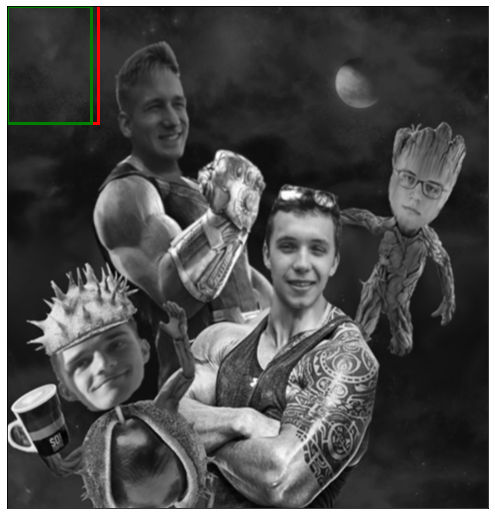

In [10]:
def hog(image):
    nwin_x = 5
    nwin_y = 5
    B = 7
    (L, C) = np.shape(image)
    H = np.zeros(shape=(nwin_x * nwin_y * B, 1))
    m = np.sqrt(L / 2.0)
    if C is 1:
        raise NotImplementedError
    step_x = np.floor(C / (nwin_x + 1))
    step_y = np.floor(L / (nwin_y + 1))
    cont = 0
    hx = np.array([[1, 0, -1]])
    hy = np.array([[-1], [0], [1]])
    grad_xr = convolve(image, hx, mode='constant', cval=0.0)
    grad_yu = convolve(image, hy, mode='constant', cval=0.0)
    angles = np.arctan2(grad_yu, grad_xr)
    magnit = np.sqrt((grad_yu ** 2 + grad_xr ** 2))
    for n in range(nwin_y):
        for m in range(nwin_x):
            cont += 1
            angles2 = angles[int(n * step_y):int((n + 2) * step_y),
                      int(m * step_x):int((m + 2) * step_x)]
            magnit2 = magnit[int(n * step_y):int((n + 2) * step_y),
                      int(m * step_x):int((m + 2) * step_x)]
            v_angles = angles2.ravel()
            v_magnit = magnit2.ravel()
            bin = 0
            H2 = np.zeros(shape=(B, 1))

            for ang_lim in np.arange(start=-np.pi + 2 * np.pi / B,
                                     stop=np.pi + 2 * np.pi / B,
                                     step=2 * np.pi / B):
                check = v_angles < ang_lim
                v_angles = (v_angles * (~check)) + (check) * 100
                H2[bin] += np.sum(v_magnit * check)
                bin += 1

            H2 = H2 / (np.linalg.norm(H2) + 0.01)
            H[(cont - 1) * B:cont * B] = H2
    return H


def face_detect_patch(patch, model):
    patch = patch / 255.0
    hog_patch = hog(patch)
    print("#@!#@!#@!")
    return 1


def get_patch(img, x, y):
    x1, x2 = x, x + PATCH_WIDTH
    y1, y2 = y, y + PATCH_HEIGHT
    return img[y1: y2, x1: x2]


def animate(i, ax, patch, patch_positions, img, model):
    markers = []
    for position in marker_positions:
        markers.append(patches.Rectangle(position, PATCH_WIDTH, PATCH_HEIGHT, fill=False, color='g',linewidth=3))

    for marker in markers:
        ax.add_patch(marker)
    if i > len(patch_positions) - 1:
        return [patch] + markers

    img_size = img.shape
    x, y = patch_positions[i]
    patch.set_xy([x, img_size[0] - PATCH_HEIGHT - y])

    cut_out = get_patch(img, x, y)
    
    if face_detect_patch(cut_out, model):
        marker_position = [x, img_size[0] - PATCH_HEIGHT - y]
        marker_positions.append(marker_position)
        marker = patches.Rectangle(marker_position, PATCH_WIDTH, PATCH_HEIGHT, fill=False,
                                   color='g', linewidth=3)
        ax.add_patch(marker)
        markers.append(marker)

    return [patch] + markers


def slided_window(path_to_img):
    # img = mpimg.imread('image2017.jpg')
    img = mpimg.imread('data sets/exlpf.jpg')
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    img = 0.2989 * r + 0.5870 * g + 0.1140 * b
    plt.rcParams['image.cmap'] = 'gray'
    plt.rcParams['image.interpolation'] = 'none'
    # fig = plt.figure(figsize=(7.5, 4.23))
    fig = plt.figure(figsize=(7.5, 7.5))
    plt.axis('equal')
    plt.tight_layout()
    ax = fig.add_subplot(111)
    ax.set_xlim(0, img.shape[1])
    ax.set_ylim(0, img.shape[0])
    ax.xaxis.set_tick_params(labelbottom=False, labeltop=False, top=False, bottom=False)
    ax.yaxis.set_tick_params(left=False, labelleft=False)

    patch = patches.Rectangle((PATCH_WIDTH, PATCH_HEIGHT), 100, 120, fill=False, color='r',
                              linewidth=3)

    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], aspect='auto',
              interpolation="bicubic")
    ax.add_patch(patch)
    patch_positions = []

    for y in range(0, img.shape[0] - PATCH_HEIGHT, STEP):
        for x in range(0, img.shape[1] - PATCH_WIDTH, STEP):
            patch_positions.append([x, y])
    model = 111
    fargs = [ax, patch, patch_positions, img, model]
    anim = animation.FuncAnimation(fig, animate,
                                   fargs=fargs,
                                   # init_func=self.initialize_animation,
                                   frames=1200,
                                   interval=2,
                                   blit=True, repeat=False)
    plt.draw()
    
PATCH_WIDTH = 92
PATCH_HEIGHT = 112  
STEP = 20
marker_positions = []
slided_window('data sets/exlpf.jpg')    
    